# XGBoost - Extreme Gradient Boosting

- ### <span style='color:green'> Here I will use MAPE and Within together to evaluate the models </span>


----


## Improving Operating Room Efficiency: A machine learning approach to predict case-time duration



#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)


-------




#### Introduction:
- XGBoosst is used for supervised learning problems, like this one, where there is a training dataset that includes values for both explanatory variables and the dependent variables—in this case, case-time duration. This algorithm balances the “training loss”—that is, how well the model fits the training data—with the complexity of the model—which can assess the degree of overfitting. XGBoost has been used in a variety of competitions and has been shown to perform well amongst the variety of ML algorithms available.
- In this exploration of XGBoost a replication of paper "Improving Operating Room Efficiency: A machine learning approach to predict case-time duration" is done. Paper link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7077507/

#### How works:
- It is a very powerful ensemble of Decision Trees that rival the power of Deep Learning
- Use Boosting- Combine weak learners(DT with one split) sequencilally and each new tree correct the errors of the previous one
- Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.
- Define objective function: A salient characteristic of objective functions is that they consist two parts: training loss and regularization term,where 𝐿 is the training loss function, and Ω is the regularization term (controls the complexity of the model, which helps us to avoid overfitting.)

                                                  obj(𝜃)=𝐿(𝜃)+Ω(𝜃)
                              
- We want to find the direction where the loss decreases the fastest --> negative derivative of loss with respect to the previous model's output
- For every step m, xgboost produces a model such that ensemble at step m is equal to ensemble at step m-1 plus the learning rate times the weak learner at step m. We want a learner that don't walk to far in any direction to avoid over come the minimum 

                                         F(m)=F(m-1)+lr* - ∂ L /∂ F(m-1)
                                         
#### Some interesting articles used:
* XGBoost Python Example: https://towardsdatascience.com/xgboost-python-example-42777d01001e
* How to Tune the Number and Size of Decision Trees with XGBoost in Python: https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

* Gradient Boosting explained [demonstration]: http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html

* A Beginner’s guide to XGBoost - GridSearchCV https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

* Hyperparameter tuning in XGBoost - xgb.cv https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

* Interpretable Machine Learning with XGBoost https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27


#### Documentations used:

* XGBoost Python Package https://xgboost.readthedocs.io/en/latest/python/python_api.html

* xgb.cv: Cross Validation https://rdrr.io/cran/xgboost/man/xgb.cv.html  (I could also used GridSearchCV)

* Custom Objective and Evaluation Metric https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html

* Diference between xgb.train and model.fit - https://www.kaggle.com/questions-and-answers/65417

-----

#### Instructions to run notebook:
- Don't run all notebook! Skip Save Model Section to avoid running a lot of time...every model is saved

-------

* [1. Data Load](#1)


* [2. Data Transformation](#2)


* [4. Create Surgeon-specific model](#4)

    * [4.1. Generate datasets](#4.1)
    * [4.2. Train -Test Split](#4.2)
    * [4.3. Setting the optimal hyperparameters of ML model](#4.3)
        * [4.3.1 Best parameters to max_depth and min_child_weight](#4.3.1)
        * [4.3.2 Best parameters to gamma, subsample and colsample_bytree](#4.3.2)
        * [4.3.3 Best parameters to eta](#4.3.3)
    * [4.4. Set Parameters of our gradient boosting ensemble](#4.4)
    * [4.5. Training](#4.5)
    * [4.6. Save Model](#4.6)
    * [4.7. Load Model](#4.7)
    * [4.8. Rashomon Curve](#4.8)
        * [4.8.1 With imbalance](#4.8.1)
        * [4.8.2 Without imbalance](#4.8.2)
    * [4.9. Prediction](#4.9)
        * [4.9.1 With imbalance](#4.9.1)
        * [4.9.2 Without imbalance](#4.9.2)
    * [4.10. SHAP Explanation](#4.9) ⟶ SHAP (SHapley Additive exPlanations): https://github.com/slundberg/shap
        * [4.10.1 SHAP Summary Plot](#4.10.1)
        * [4.10.2 Compute SHAP Interaction Values](#4.10.2)
        * [4.10.3 SHAP Dependence Plots](#4.10.3)
        


-------

## 1. Data Load <a class="anchor" id="1"></a> 



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import shap
import xgboost as xgb
import matplotlib.pyplot as plt



# import OneHotEncoder --> LabelEncoder only is not a good choice, since it 
#brings in a natural ordering for different classes.
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_boston
from sklearn.model_selection import *
from sklearn.metrics import *

#table
from tabulate import tabulate

In [2]:
%store -r data_ml #load dataset generated in other Exploration notebook
data_ml.head()

no stored variable or alias #load
no stored variable or alias dataset
no stored variable or alias generated
no stored variable or alias in
no stored variable or alias other
no stored variable or alias Exploration
no stored variable or alias notebook


,Speciality,SurgeryNumber,SurgeryPerformed_perDoctor,part_of_day,CUF_Unit,FLG_AMB_INT,Anesthesia,FLG_PROG_URG,I1,Procedures_I,Doctor,Gender,RealRoomDuration,Age,CUFPlannedDuration,Month,Weekday
0,CIRURGIA GERAL,4,78,Noon(13-16),11,I,RAQ,P,39150013,1,132273102,M,41,65.0,60,April,Tuesday
1,OFTALMOLOGIA,2,51,Morning(9-12),11,A,SED,P,46050006,1,093935231,M,32,71.0,60,July,Wednesday
2,UROLOGIA,1,51,Noon(13-16),11,I,RAQ,P,40010045,1,775653212,M,27,71.0,60,April,Thursday
3,UROLOGIA,1,28,Eve(17-20),11,I,AG,P,40010038,3,462002202,M,55,71.0,60,May,Monday
4,UROLOGIA,1,34,Eve(17-20),11,A,AG,P,40010038,1,462002202,M,12,71.0,60,June,Monday


In [3]:
data_ml['Procedures_I'] = data_ml['Procedures_I'].astype(float) 
data_ml = data_ml[data_ml.Speciality != 'ADMINISTRAÇÃO REQUISIÇÕES']

In [4]:
print("Dataset has {} entries and {} features".format(*data_ml.shape))

Dataset has 169770 entries and 17 features


-------

## 2. Data Transformation <a class="anchor" id="2"></a> 

-Similar to the paper https://linkinghub.elsevier.com/retrieve/pii/S1072751519304053

In [5]:
%store -r Genenal_Dataset
%store -r Specialities_Dataset
%store -r Surgeons_Dataset

%store -r list_surgeons
%store -r list_specialities

In [6]:
df_test_surgeon = pd.read_csv('Data_test_surgeon',header='infer')
df_test_surgeon


,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
0,0,1,0,1,150,1,16,74.0,20,22.274376,28.212867,28.922468,28.931225,28.601695,28.526646,22.730851
1,0,1,1,5,266,1,12,53.0,20,22.274376,28.212867,28.922468,28.931225,31.794393,29.081590,22.730851
2,0,1,1,2,269,1,39,53.0,20,22.274376,28.212867,28.922468,28.931225,28.581395,28.526646,49.927586
3,0,1,0,2,102,1,20,65.0,20,23.431818,28.212867,28.922468,28.931225,25.790476,29.081590,22.730851
4,0,1,1,4,63,1,20,22.0,20,24.076953,28.212867,28.922468,28.931225,28.039216,28.663239,22.730851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,1,0,2,1577,1,25,38.0,30,23.431818,27.390625,28.922468,28.931225,26.371429,28.663239,22.730851
154,0,1,0,5,1589,1,19,41.0,30,24.076953,42.573529,28.922468,28.931225,28.136842,29.081590,49.927586
155,0,1,1,3,1302,1,17,71.0,20,22.274376,28.212867,28.922468,28.931225,29.500000,29.081590,22.730851
156,0,1,1,2,1547,1,14,55.0,30,24.229623,27.390625,28.922468,28.931225,27.347826,29.081590,21.485714


In [7]:
df_train_surgeon = pd.read_csv('Data_withsyntheticdata_surgeon',header='infer')
df_train_surgeon

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
0,0,1,0,6.0,190.0,1.0,45.000000,73.000000,NaN,52.334804,28.212867,28.922468,28.931225,28.601695,29.081590,49.927586
1,0,1,0,2.0,920.0,2.0,20.000000,68.000000,20.0,22.274376,28.212867,28.922468,28.931225,25.790476,28.526646,22.730851
2,0,1,0,3.0,192.0,1.0,36.832935,71.046403,NaN,53.762436,28.212510,28.922685,28.930151,31.281645,28.848036,41.516894
3,0,1,0,4.0,600.0,1.0,20.000000,80.000000,30.0,22.274376,27.390625,28.922468,28.931225,28.601695,26.365854,22.730851
4,0,1,1,4.0,446.0,1.0,23.000000,56.000000,60.0,22.274376,28.212867,28.922468,28.931225,28.136842,28.663239,22.730851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,0,1,0,3.0,455.0,1.0,55.663351,82.065232,NaN,70.357113,28.212969,28.921439,28.931835,29.499133,28.775653,49.928664
2457,0,1,1,7.0,711.0,1.0,51.229983,59.679937,NaN,53.742975,28.213870,28.921902,28.931201,31.823513,28.903062,49.929983
2458,0,1,1,3.0,1218.0,1.0,20.000000,66.000000,30.0,22.274376,28.212867,28.922468,28.931225,27.347826,28.526646,22.730851
2459,0,1,1,4.0,369.0,1.0,28.000000,69.000000,20.0,53.745098,28.212867,28.922468,28.931225,27.347826,28.663239,49.927586


-------

* ### 3.3.  Setting the optimal hyperparameters of ML model  <a class="anchor" id="3.3"></a> 


* In order to tune the other hyperparameters, we will use the cv function from XGBoost. It allows us to run cross-validation on our training dataset and returns a mean MAPE score
* The learnable parameters are the choice of decision variables at each node and the numeric thresholds used to decide whether to take the left or right branch when generating predictions.

In [8]:
#In order for XGBoost to be able to use our data: transform into DMatrix, a specific format that XGBoost can handle
def Dmatrix(split):
    D_train = xgb.DMatrix(split[0], label=split[2])
    D_test = xgb.DMatrix(split[1], label=split[3])
    return D_train, D_test

#### 3.3.1  Generate evaluation function  <a class="anchor" id="3.3.1"></a> 


Note: I generate MAPE funtion because not exist in XGBoost. We are going to use MAPE to evaluate the quality of our predictions

* Evaluation Metrics **Within**/**MAPE**/**Overuse**/**Underuse**

In [9]:
def xgb_mape(preds, D_train):
    labels=D_train.get_label()
    return('mape', np.mean(np.abs((labels - preds) / (labels)))) #return necessary to 

In [10]:
#count 

def count_over(arr, x):
    TotalValue = 0
    for i in range(len(arr)):
        if arr[i] > x:
            TotalValue=TotalValue+1
    return TotalValue

def count_under(arr, x):
    TotalValue = 0
    for i in range(len(arr)):
        if arr[i] < x:
            TotalValue=TotalValue+1
    return TotalValue

def count_within(arr, x):
    TotalValue = 0
    abs_arr=np.absolute(arr)
    for i in range(len(arr)):
        if abs_arr[i] <= x:
            TotalValue=TotalValue+1
    return TotalValue

In [11]:
def xgb_overutilization(preds, D_train): #0verutilizatiom
    labels=D_train.get_label()
    
    error=(labels - preds) / (labels)
    length=len(error)
    counts=count_over(error, 0.1)

    return('overuse',counts/length)

In [12]:
def xgb_underutilization(preds, D_train):
    labels=D_train.get_label()
    
    error=(labels - preds) / (labels)
    length=len(error)
    counts=count_under(error, -0.1)

    return('underuse', counts/length)

In [13]:
def xgb_within(preds, D_train):
    labels=D_train.get_label()
    
    error=(labels - preds) / (labels)
    length=len(error)
    counts=count_within(error, 0.1) #i'm using 10 percent as threshold
    within=-(counts/length)

    return('within', within) # quero minimizar o negativo, porque quero maximizar o within

* Union of **MAPE** with **Within** - because I cannot use two costumize evaluate funtions

In [14]:
def xgb_within_mape(preds, D_train):
    within=xgb_within(preds, D_train)[1]
    mape=xgb_mape(preds, D_train)[1]

    return('within_mape', within+mape) # quero minimazr o negativo, porque quero maximizar o within

* Objective funtion **MAPE** - is not working

In [15]:
def mape_objective_function(preds, dtrain):  # https://www.kaggle.com/questions-and-answers/78312
    labels = dtrain.get_label()
    grad = (preds - labels) / (0.2 + labels * np.abs(preds - labels)) # 0.2 is there only to avoid dividing by zero.
    hess = 0.1 + np.zeros(len(preds)); #For the hessian, we need to have a value close to 0 but not 0.
    return grad, hess


#### 3.3.2  Best parameters to **max_depth** and **min_child_weight**  <a class="anchor" id="3.3.2"></a> 


- max_depth is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.
- min_child_weight is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.
- Thus, those parameters can be used to control the complexity of the trees. It is important to tune them together in order to find a good trade-off between model bias and variance

In [90]:
#dictionary of parameters.
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
} 
#reg:squarederror
#reg:linear

#### 3.3.3  Best parameters to **gamma**, **subsample** and **colsample_bytree**  <a class="anchor" id="3.3.3"></a> 


- subsample corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.


In [91]:
gridsearch_params_2 = [
    (gamma,colsample_bytree,subsample)
    for gamma in np.arange(0., 0.5, 0.1)
    for colsample_bytree in [i/10. for i in range(7,11)]
    for subsample in [i/10. for i in range(7,11)]
]


## 4.  Create Surgeon-specific model <a class="anchor" id="4"></a> 

* #### 375 number of Surgeon-specific models

In [16]:
Datasets_surgeon_96440008=Surgeons_Dataset['96440008']

In [17]:
  
Datasets_surgeon_96440008['TrainSet']['CUF_Unit']=Datasets_surgeon_96440008['TrainSet']['CUF_Unit'].astype('float')
Datasets_surgeon_96440008['TrainSet']['Anesthesia']=Datasets_surgeon_96440008['TrainSet']['Anesthesia'].astype('float')
Datasets_surgeon_96440008['TrainSet']['Speciality']=Datasets_surgeon_96440008['TrainSet']['Speciality'].astype('float')
Datasets_surgeon_96440008['TrainSet']['I1']=Datasets_surgeon_96440008['TrainSet']['I1'].astype('float')
Datasets_surgeon_96440008['TrainSet']['Month']=Datasets_surgeon_96440008['TrainSet']['Month'].astype('float')
Datasets_surgeon_96440008['TrainSet']['Weekday']=Datasets_surgeon_96440008['TrainSet']['Weekday'].astype('float')
Datasets_surgeon_96440008['TrainSet']['Procedures_I']=Datasets_surgeon_96440008['TrainSet']['Procedures_I'].astype('int64')
Datasets_surgeon_96440008['TrainSet']['Daily Surgery Number_perDoctor']=Datasets_surgeon_96440008['TrainSet']['Daily Surgery Number_perDoctor'].astype('int64')
Datasets_surgeon_96440008['TrainSet']['Surgery Number Performed_perDoctor']=Datasets_surgeon_96440008['TrainSet']['Surgery Number Performed_perDoctor'].astype('int64')


Datasets_surgeon_96440008['TestSet']['Anesthesia']=Datasets_surgeon_96440008['TestSet']['Anesthesia'].astype('float')
Datasets_surgeon_96440008['TestSet']['Speciality']=Datasets_surgeon_96440008['TestSet']['Speciality'].astype('float')
Datasets_surgeon_96440008['TestSet']['CUF_Unit']=Datasets_surgeon_96440008['TestSet']['CUF_Unit'].astype('float')
Datasets_surgeon_96440008['TestSet']['I1']=Datasets_surgeon_96440008['TestSet']['I1'].astype('float')
Datasets_surgeon_96440008['TestSet']['Month']=Datasets_surgeon_96440008['TestSet']['Month'].astype('float')
Datasets_surgeon_96440008['TestSet']['Weekday']=Datasets_surgeon_96440008['TestSet']['Weekday'].astype('float')
Datasets_surgeon_96440008['TestSet']['Procedures_I']=Datasets_surgeon_96440008['TestSet']['Procedures_I'].astype('int64')
Datasets_surgeon_96440008['TestSet']['Daily Surgery Number_perDoctor']=Datasets_surgeon_96440008['TestSet']['Daily Surgery Number_perDoctor'].astype('int64')
Datasets_surgeon_96440008['TestSet']['Surgery Number Performed_perDoctor']=Datasets_surgeon_96440008['TestSet']['Surgery Number Performed_perDoctor'].astype('int64')
    

* ### 4.2.  Split Data  <a class="anchor" id="4.2"></a> 

In [18]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])
y = {}
X = {}
X_without_label = {}

y=Datasets_surgeon_96440008['TrainSet']['Real Room Duration']
X=Datasets_surgeon_96440008['TrainSet']
X_without_label=Datasets_surgeon_96440008['TrainSet'].drop(columns=['Real Room Duration'])
X_without_label=Datasets_surgeon_96440008['TrainSet'].drop(columns=['CUF Planned Duration'])


In [19]:
# Train and test split using sklearn
def splittrain_test():
    
    X_train=Datasets_surgeon_96440008['TrainSet'].reset_index(drop=True)
    X_test=Datasets_surgeon_96440008['TestSet'].reset_index(drop=True)
    y_train=Datasets_surgeon_96440008['TrainSet']['Real Room Duration'].reset_index(drop=True)
    y_test=Datasets_surgeon_96440008['TestSet']['Real Room Duration'].reset_index(drop=True)
    
    
    #this is used to see later how accurate are predictions
    X_train_planned=X_train['CUF Planned Duration'] 
    X_test_planned=X_test['CUF Planned Duration']


    X_train=X_train.drop(columns=['CUF Planned Duration'])
    X_test=X_test.drop(columns=['CUF Planned Duration'])
    
    X_train=X_train.drop(columns=['Real Room Duration'])
    X_test=X_test.drop(columns=['Real Room Duration'])
    
    return X_train, X_test, y_train, y_test, X_train_planned,X_test_planned




In [20]:
Splited_data_Surgeon={} #creation of dictionaries for all 24 models 

i=299

Splited_data_Surgeon.update({list_surgeons[i]:{}})
    


In [21]:


split=splittrain_test()
matrixes=Dmatrix(split)

Splited_data_Surgeon['96440008'].update({"Splitdataset": [split[0],split[1],split[2],split[3],split[4],split[5] ]})
Splited_data_Surgeon['96440008'].update({"Dmatrixes": [matrixes[0], matrixes[1]]})


In [22]:
Splited_data_Surgeon_categorical={} #creation of dictionaries for all 24 models 

i=299

Splited_data_Surgeon_categorical.update({list_surgeons[i]:{}})
    

In [23]:
# Train and test split using sklearn
def splittrain_test_categorical():
    
    X_train=Datasets_surgeon_96440008['TrainSet'][Datasets_surgeon_96440008['TrainSet']['Real Room Duration']>45].reset_index(drop=True)
    X_test=Datasets_surgeon_96440008['TestSet'][Datasets_surgeon_96440008['TestSet']['Real Room Duration']>45].reset_index(drop=True)
    y_train=Datasets_surgeon_96440008['TrainSet'][Datasets_surgeon_96440008['TrainSet']['Real Room Duration']>45]['Real Room Duration'].reset_index(drop=True)
    y_test=Datasets_surgeon_96440008['TestSet'][Datasets_surgeon_96440008['TestSet']['Real Room Duration']>45]['Real Room Duration'].reset_index(drop=True)
    
    
    #this is used to see later how accurate are predictions
    X_train_planned=X_train['CUF Planned Duration'] 
    X_test_planned=X_test['CUF Planned Duration']


    X_train=X_train.drop(columns=['CUF Planned Duration'])
    X_test=X_test.drop(columns=['CUF Planned Duration'])
    
    X_train=X_train.drop(columns=['Real Room Duration'])
    X_test=X_test.drop(columns=['Real Room Duration'])
    
    return X_train, X_test, y_train, y_test, X_train_planned,X_test_planned


In [24]:
split=splittrain_test_categorical()
matrixes=Dmatrix(split)

Splited_data_Surgeon_categorical['96440008'].update({"Splitdataset": [split[0],split[1],split[2],split[3],split[4],split[5] ]})
Splited_data_Surgeon_categorical['96440008'].update({"Dmatrixes": [matrixes[0], matrixes[1]]})


----

In [27]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])
y = {}
X = {}
X_without_label = {}

y=df_train_surgeon['Real Room Duration']
X=df_train_surgeon
X_without_label=df_train_surgeon.drop(columns=['Real Room Duration'])


In [28]:
# Train and test split using sklearn
def splittrain_test():
    
    X_train=df_train_surgeon.reset_index(drop=True)
    X_test=df_test_surgeon.reset_index(drop=True)
    y_train=df_train_surgeon['Real Room Duration'].reset_index(drop=True)
    y_test=df_test_surgeon['Real Room Duration'].reset_index(drop=True)
    
    
    #this is used to see later how accurate are predictions
    X_train_planned=X_train['CUF Planned Duration'] 
    X_test_planned=X_test['CUF Planned Duration']


    X_train=X_train.drop(columns=['CUF Planned Duration'])
    X_test=X_test.drop(columns=['CUF Planned Duration'])
    
    X_train=X_train.drop(columns=['Real Room Duration'])
    X_test=X_test.drop(columns=['Real Room Duration'])
    
    return X_train, X_test, y_train, y_test, X_train_planned,X_test_planned




In [29]:
# Train and test split using sklearn
def splittrain_test_categorical():
    
    X_train=df_train_surgeon[df_train_surgeon['Real Room Duration']>28].reset_index(drop=True)
    X_test=df_test_surgeon[df_test_surgeon['Real Room Duration']>28].reset_index(drop=True)
    y_train=df_train_surgeon[df_train_surgeon['Real Room Duration']>28]['Real Room Duration'].reset_index(drop=True)
    y_test=df_test_surgeon[df_test_surgeon['Real Room Duration']>28]['Real Room Duration'].reset_index(drop=True)
    
    
    #this is used to see later how accurate are predictions
    X_train_planned=X_train['CUF Planned Duration'] 
    X_test_planned=X_test['CUF Planned Duration']


    X_train=X_train.drop(columns=['CUF Planned Duration'])
    X_test=X_test.drop(columns=['CUF Planned Duration'])
    
    X_train=X_train.drop(columns=['Real Room Duration'])
    X_test=X_test.drop(columns=['Real Room Duration'])
    
    return X_train, X_test, y_train, y_test, X_train_planned,X_test_planned

In [30]:
Splited_data_Surgeon={} #creation of dictionaries for all 24 models 

i=299

Splited_data_Surgeon.update({list_surgeons[i]:{}})
    

In [31]:
Splited_data_Surgeon_categorical={} #creation of dictionaries for all 24 models 

i=299

Splited_data_Surgeon_categorical.update({list_surgeons[i]:{}})
   

In [32]:


split=splittrain_test()
matrixes=Dmatrix(split)

Splited_data_Surgeon['96440008'].update({"Splitdataset": [split[0],split[1],split[2],split[3],split[4],split[5] ]})
Splited_data_Surgeon['96440008'].update({"Dmatrixes": [matrixes[0], matrixes[1]]})


In [33]:
split=splittrain_test_categorical()
matrixes=Dmatrix(split)

Splited_data_Surgeon_categorical['96440008'].update({"Splitdataset": [split[0],split[1],split[2],split[3],split[4],split[5] ]})
Splited_data_Surgeon_categorical['96440008'].update({"Dmatrixes": [matrixes[0], matrixes[1]]})


* ### 4.3.  Setting the optimal hyperparameters of ML model  <a class="anchor" id="4.3"></a> 

#### 4.3.1  Best parameters to **max_depth** and **min_child_weight**  <a class="anchor" id="4.3.1"></a> 

In [111]:
# Define initial best params and MAPE
def best_parameters1(i):
    
    gridsearch_params = [
        (max_depth, min_child_weight)
        for max_depth in range(i,i+1)
        for min_child_weight in range(1,8)
    ]
    
    min_mape = float("Inf")
    best_params = None
    for max_depth, min_child_weight in gridsearch_params:
        
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['max_depth'] = max_depth
        params['min_child_weight'] = min_child_weight
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data_Surgeon['96440008']["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape, #if we want to costumize our Evaluation Metric
        
            #if I want to use both metrics
            #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
    # Update best MAPE
    #mean_within = cv_results['test-within-mean'].min()
    #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()
    
        mean_total=mean_mape
    #mean_total=mean_within+mean_mape
    #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params = (max_depth,min_child_weight)
        
    
    print("Best params {} : max_depth: {}, min_child_weight: {} MAPE: {}".format(i,best_params[0], best_params[1], min_mape))
    return best_params

#### 4.3.2  Best parameters to gamma,colsample_bytree and subsample tune <a class="anchor" id="4.3.2"></a> 


In [112]:
# Define initial best params and MAPE
def best_parameters2():
    min_mape = float("Inf")
    best_params_2 = None
    for gamma,colsample_bytree,subsample in gridsearch_params_2:
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['gamma'] = gamma
        params['colsample_bytree'] = colsample_bytree
        params['subsample'] = subsample
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data_Surgeon['96440008']["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
        # Update best MAPE and Within

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and 
        #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_2 = (gamma,colsample_bytree,subsample)
    print("Best params: gamma: {},colsample_bytree: {},subsample: {} MAPE: {}".format(best_params_2[0], best_params_2[1],best_params_2[2], min_mape))
    return best_params_2

#### 4.3.3  Best parameters to eta <a class="anchor" id="4.3.3"></a> 


In [113]:
#Best parameter to eta
# This can take some time…
def best_parameters3():
    min_mape = float("Inf")
    best_params_eta = None
    for eta in np.arange(0.01, 0.35, 0.005):
        #print("CV with eta={}".format(eta))
        # We update our parameters
        params['eta'] = eta
        # Run CV
        cv_results = xgb.cv(
                params,
                Splited_data_Surgeon['96440008']["Dmatrixes"][0],
                num_boost_round=num_boost_round,
                seed=42,
                nfold=5,
                feval = xgb_within_mape,
                #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
                maximize=False,
                early_stopping_rounds=10
              )
        # Update best score

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and within
        #print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_eta = eta
    print("Best params: {}, MAPE: {}".format(best_params_eta, min_mape))
    return best_params_eta


* ### 4.4.  Set Parameters of our gradient boosting ensemble  <a class="anchor" id="4.4"></a> 

I used the same funtions created in 3.4.

In [114]:
def set_parameters(i):
    best1=best_parameters1(i)
    best2=best_parameters2()
    best3=best_parameters3()
    params = {
        # Parameters that we are going to tune.
        'max_depth':best1[0],
        'min_child_weight': best1[1],
        'eta':best3,
        'colsample_bytree': best2[1],
        'subsample': best2[2],
        'gamma': best2[0],
        # Other parameters 
        'objective':'reg:squarederror', # regression MSE
        #the parameter disable_default_eval_metric is used to suppress the default metric in XGBoost.
        'disable_default_eval_metric': 1
    }

    #params['eval_metric'] = "mape"
    num_boost_round = 999
    return params

In [115]:
num_boost_round = 999

* ### 4.5.  Training  <a class="anchor" id="4.5"></a> 

In [116]:
def training_with_early_stopping_rounds(i):
    parameters=set_parameters(i)
    model = xgb.train(
        parameters,
        Splited_data_Surgeon['96440008']["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data_Surgeon['96440008']["Dmatrixes"][1], "Test")],
        early_stopping_rounds=10,
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    #print("Best MAPE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))
    return model.best_score,model.best_iteration+1,parameters


In [117]:
#remove early_stopping_rounds=10 to find best model

#num_boost_round = model.best_iteration + 1

def training_without_early_stopping_rounds(i):
    train_without=training_with_early_stopping_rounds(i)
    num_boost_round=train_without[1]

    best_model = xgb.train(
        train_without[2],
        Splited_data_Surgeon['96440008']["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data_Surgeon['96440008']["Dmatrixes"][1], "Test")],
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    return train_without[2],best_model




* ### 4.6.  Save Model  <a class="anchor" id="4.6"></a> 


In [118]:
def save_model_Surgeon(i):
    pos_training=training_without_early_stopping_rounds(i)
    best_model=pos_training[1]
    parameters=pos_training[0]
    
    name="Surgeon_96440008_depth{}.model".format(i)
    best_model.save_model(name)
    
    return best_model,parameters,name

In [119]:
Dictionary_Surgeon_models={} #creation of dictionaries for all 24 models 

for j in range(1,10):
    Dictionary_Surgeon_models.update({j:{}})

#this_dict = {}this_dict = {}

In [120]:
t=1

for j in range(1,10):
    
    
    Dictionary_Surgeon_models[j].update({"Data": [X, y]})
    model=save_model_Surgeon(t)
    Dictionary_Surgeon_models[j].update({"BestParameters": [model[0],model[1],model[2]]})
    t+=2

Best params 1 : max_depth: 1, min_child_weight: 1 MAPE: 0.0289472
Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 1.0 MAPE: 0.017415999999999997
Best params: 0.05499999999999999, MAPE: 0.0026339999999999996
[0]	Test-within_mape:0.91061
[1]	Test-within_mape:0.84841
[2]	Test-within_mape:0.78976
[3]	Test-within_mape:0.73412
[4]	Test-within_mape:0.68135
[5]	Test-within_mape:0.63175
[6]	Test-within_mape:0.57241
[7]	Test-within_mape:0.52933
[8]	Test-within_mape:0.46492
[9]	Test-within_mape:0.39048
[10]	Test-within_mape:0.35487
[11]	Test-within_mape:0.33950
[12]	Test-within_mape:0.33695
[13]	Test-within_mape:0.30599
[14]	Test-within_mape:0.28731
[15]	Test-within_mape:0.22438
[16]	Test-within_mape:0.20165
[17]	Test-within_mape:0.15205
[18]	Test-within_mape:0.12134
[19]	Test-within_mape:0.09460
[20]	Test-within_mape:0.09340
[21]	Test-within_mape:0.02653
[22]	Test-within_mape:0.08045
[23]	Test-within_mape:0.07724
[24]	Test-within_mape:0.03147
[25]	Test-within_mape:0.08726
[26]	Test-with

[3]	Test-within_mape:0.08172
[4]	Test-within_mape:0.03190
[5]	Test-within_mape:-0.04080
Best params 7 : max_depth: 7, min_child_weight: 4 MAPE: 0.003080999999999999
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.9 MAPE: -0.0009998000000000008
Best params: 0.11999999999999998, MAPE: -0.005619000000000002
[0]	Test-within_mape:0.83799
[1]	Test-within_mape:0.71640
[2]	Test-within_mape:0.61175
[3]	Test-within_mape:0.51396
[4]	Test-within_mape:0.41448
[5]	Test-within_mape:0.30819
[6]	Test-within_mape:0.25000
[7]	Test-within_mape:0.14517
[8]	Test-within_mape:0.08213
[9]	Test-within_mape:0.07592
[10]	Test-within_mape:0.05769
[11]	Test-within_mape:0.00811
[12]	Test-within_mape:0.02549
[13]	Test-within_mape:-0.00077
[14]	Test-within_mape:-0.01121
[15]	Test-within_mape:-0.06770
[16]	Test-within_mape:-0.07295
[17]	Test-within_mape:-0.07308
[18]	Test-within_mape:-0.08866
[19]	Test-within_mape:-0.06997
[20]	Test-within_mape:-0.05185
[21]	Test-within_mape:-0.04011
[22]	Test-within_mape:-0

[47]	Test-within_mape:0.04391
[48]	Test-within_mape:0.05040
[49]	Test-within_mape:0.03800
[50]	Test-within_mape:0.03817
[51]	Test-within_mape:0.02625
[52]	Test-within_mape:0.02682
[53]	Test-within_mape:0.02144
[54]	Test-within_mape:0.02147
[55]	Test-within_mape:0.00338
[56]	Test-within_mape:-0.00108
Best params 15 : max_depth: 15, min_child_weight: 2 MAPE: 0.020796600000000002
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 1.0 MAPE: 0.004721600000000001
Best params: 0.19499999999999998, MAPE: -0.006989
[0]	Test-within_mape:0.75093
[1]	Test-within_mape:0.56400
[2]	Test-within_mape:0.40703
[3]	Test-within_mape:0.25441
[4]	Test-within_mape:0.16457
[5]	Test-within_mape:0.10392
[6]	Test-within_mape:0.11421
[7]	Test-within_mape:0.07545
[8]	Test-within_mape:0.04698
[9]	Test-within_mape:0.02269
[10]	Test-within_mape:0.03434
[11]	Test-within_mape:0.03082
[12]	Test-within_mape:0.04737
[13]	Test-within_mape:0.05381
[14]	Test-within_mape:0.03777
[15]	Test-within_mape:0.04245
[16]	Test-wi

In [166]:
def save_model_Surgeon(i):
    pos_training=training_without_early_stopping_rounds(i)
    best_model=pos_training[1]
    parameters=pos_training[0]
    
    name="Surgeon_96440008_withoutimbalanced_depth{}.model".format(i)
    best_model.save_model(name)
    
    return best_model,parameters,name

In [167]:
Dictionary_Surgeon_models_witjoutimbalanced={} #creation of dictionaries for all 24 models 

for j in range(1,10):
    Dictionary_Surgeon_models_witjoutimbalanced.update({j:{}})

#this_dict = {}this_dict = {}

In [168]:
t=1

for j in range(1,10):
    
    
    Dictionary_Surgeon_models_witjoutimbalanced[j].update({"Data": [X, y]})
    model=save_model_Surgeon(t)
    Dictionary_Surgeon_models_witjoutimbalanced[j].update({"BestParameters": [model[0],model[1],model[2]]})
    t+=2

Best params 1 : max_depth: 1, min_child_weight: 6 MAPE: 0.0044567999999999995
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.8 MAPE: -0.008208799999999999
Best params: 0.3, MAPE: -0.0033295999999999994
[0]	Test-within_mape:0.55250
[1]	Test-within_mape:0.23143
[2]	Test-within_mape:0.04813
[3]	Test-within_mape:0.00733
[4]	Test-within_mape:0.09119
[5]	Test-within_mape:0.18080
[6]	Test-within_mape:0.14560
[7]	Test-within_mape:0.17097
[8]	Test-within_mape:0.17925
[9]	Test-within_mape:0.17398
[10]	Test-within_mape:0.17360
[11]	Test-within_mape:0.16854
[12]	Test-within_mape:0.18031
[0]	Test-within_mape:0.55250
[1]	Test-within_mape:0.23143
[2]	Test-within_mape:0.04813
[3]	Test-within_mape:0.00733
Best params 3 : max_depth: 3, min_child_weight: 7 MAPE: -0.0446144
Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 1.0 MAPE: -0.05000020000000001
Best params: 0.16499999999999998, MAPE: -0.04728140000000001
[0]	Test-within_mape:0.77371
[1]	Test-within_mape:0.58554
[2]	Test-within_

Best params 13 : max_depth: 13, min_child_weight: 7 MAPE: -0.0761964
Best params: gamma: 0.30000000000000004,colsample_bytree: 1.0,subsample: 1.0 MAPE: -0.0761964
Best params: 0.27999999999999997, MAPE: -0.08485380000000001
[0]	Test-within_mape:0.63331
[1]	Test-within_mape:0.37432
[2]	Test-within_mape:0.21495
[3]	Test-within_mape:0.08799
[4]	Test-within_mape:0.01940
[5]	Test-within_mape:-0.03202
[6]	Test-within_mape:-0.01050
[7]	Test-within_mape:0.06104
[8]	Test-within_mape:0.05852
[9]	Test-within_mape:0.06382
[10]	Test-within_mape:0.07874
[11]	Test-within_mape:0.07024
[12]	Test-within_mape:0.07418
[13]	Test-within_mape:0.09787
[14]	Test-within_mape:0.08700
[15]	Test-within_mape:0.09376
[0]	Test-within_mape:0.63331
[1]	Test-within_mape:0.37432
[2]	Test-within_mape:0.21495
[3]	Test-within_mape:0.08799
[4]	Test-within_mape:0.01940
[5]	Test-within_mape:-0.03202
Best params 15 : max_depth: 15, min_child_weight: 6 MAPE: -0.0609654
Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 1.0

* ### 4.7. Load Model  <a class="anchor" id="4.7"></a> 


In [25]:
def percCal(x,y):
    return (x-y)*100/x

In [26]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Loading_Surgeon_models={}  

for j in range(1,10):
    Loading_Surgeon_models.update({j:{}})

t=1
for i in range(1,10): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    bst_speciality = xgb.Booster()
    name="Surgeon_96440008_depth{}.model".format(t)
    Loading_Surgeon_models[i].update({"Load Model":bst_speciality.load_model(name)})
    Loading_Surgeon_models[i].update({"Label Test":bst_speciality.predict(Splited_data_Surgeon['96440008']["Dmatrixes"][1])})
    Loading_Surgeon_models[i].update({"Planned CUF":Splited_data_Surgeon['96440008']["Splitdataset"][5]})
    Loading_Surgeon_models[i].update({"Real Duration":Splited_data_Surgeon['96440008']["Splitdataset"][3]})
    
    rf_score_train = np.round(mean_squared_error(bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][0]),Splited_data_Surgeon_categorical['96440008']["Splitdataset"][2],squared=False))

    rf_score = np.round(mean_squared_error(bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][1]),Splited_data_Surgeon_categorical['96440008']["Splitdataset"][3],squared=False))
    
    dataset_predicton = {"Real Duration": Loading_Surgeon_models[i]["Real Duration"], "Planned by Cuf": Loading_Surgeon_models[i]["Planned CUF"], "Labels from XGBoost": Loading_Surgeon_models[i]["Label Test"]}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
    
    #Overutilization 
    CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models[i].update({"Depth": t})
    Loading_Surgeon_models[i].update({"TestScore": rf_score})
    Loading_Surgeon_models[i].update({"TrainScore": rf_score_train})
    Loading_Surgeon_models[i].update({"Dataset_predicton": dataset_predicton})

    Loading_Surgeon_models[i].update({"Percentage": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    Loading_Surgeon_models[i].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})

    
    dataset_predicton = {"Real Duration": Splited_data_Surgeon['96440008']["Splitdataset"][2], "Labels from XGBoost": bst_speciality.predict(Splited_data_Surgeon['96440008']["Dmatrixes"][0])}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models[i].update({"Percentage_Train": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    
    dataset_predicton = {"Real Duration": Splited_data_Surgeon_categorical['96440008']["Splitdataset"][2], "Labels from XGBoost": bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][0])}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models[i].update({"Percentage_Train_categorical": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    
    dataset_predicton = {"Real Duration": Splited_data_Surgeon_categorical['96440008']["Splitdataset"][3], "Labels from XGBoost": bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][1])}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models[i].update({"Percentage_Test_categorical": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    Loading_Surgeon_models[i].update({"Dataset categorical ": [dataset_predicton]})
    t+=2                                             







In [53]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Loading_Surgeon_models_withoutimbalanced={}  

for j in range(1,10):
    Loading_Surgeon_models_withoutimbalanced.update({j:{}})

t=1
for i in range(1,10): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    bst_speciality = xgb.Booster()
    name="Surgeon_96440008_withoutimbalanced_depth{}.model".format(t)
    Loading_Surgeon_models_withoutimbalanced[i].update({"Load Model":bst_speciality.load_model(name)})
    Loading_Surgeon_models_withoutimbalanced[i].update({"Label Test":bst_speciality.predict(Splited_data_Surgeon['96440008']["Dmatrixes"][1])})
    Loading_Surgeon_models_withoutimbalanced[i].update({"Planned CUF":Splited_data_Surgeon['96440008']["Splitdataset"][5]})
    Loading_Surgeon_models_withoutimbalanced[i].update({"Real Duration":Splited_data_Surgeon['96440008']["Splitdataset"][3]})
    
    rf_score_train = np.round(mean_squared_error(bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][0]),Splited_data_Surgeon_categorical['96440008']["Splitdataset"][2],squared=False))

    rf_score = np.round(mean_squared_error(bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][1]),Splited_data_Surgeon_categorical['96440008']["Splitdataset"][3],squared=False))
    
    dataset_predicton = {"Real Duration": Loading_Surgeon_models_withoutimbalanced[i]["Real Duration"], "Planned by Cuf": Loading_Surgeon_models_withoutimbalanced[i]["Planned CUF"], "Labels from XGBoost": Loading_Surgeon_models_withoutimbalanced[i]["Label Test"]}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
    
    #Overutilization 
    CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models_withoutimbalanced[i].update({"Depth": t})
    Loading_Surgeon_models_withoutimbalanced[i].update({"TestScore": rf_score})
    Loading_Surgeon_models_withoutimbalanced[i].update({"TrainScore": rf_score_train})
    Loading_Surgeon_models_withoutimbalanced[i].update({"Dataset_predicton": dataset_predicton})

    Loading_Surgeon_models_withoutimbalanced[i].update({"Percentage": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    Loading_Surgeon_models_withoutimbalanced[i].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})

    
    dataset_predicton = {"Real Duration": Splited_data_Surgeon['96440008']["Splitdataset"][2], "Labels from XGBoost": bst_speciality.predict(Splited_data_Surgeon['96440008']["Dmatrixes"][0])}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models_withoutimbalanced[i].update({"Percentage_Train": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    
    dataset_predicton = {"Real Duration": Splited_data_Surgeon_categorical['96440008']["Splitdataset"][2], "Labels from XGBoost": bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][0])}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models_withoutimbalanced[i].update({"Percentage_Train_categorical": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    
    dataset_predicton = {"Planned by Cuf": Splited_data_Surgeon_categorical['96440008']["Splitdataset"][5],"Real Duration": Splited_data_Surgeon_categorical['96440008']["Splitdataset"][3], "Labels from XGBoost": bst_speciality.predict(Splited_data_Surgeon_categorical['96440008']["Dmatrixes"][1])}
    dataset_predicton=pd.DataFrame(dataset_predicton)
        
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    #Underutilization
    
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    #Within
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

    Loading_Surgeon_models_withoutimbalanced[i].update({"Percentage_Test_categorical": [XGBoost_Within, XGBoost_under, XGBoost_overuse]})
    Loading_Surgeon_models_withoutimbalanced[i].update({"Dataset categorical ": [dataset_predicton]})
    t+=2                                                        




* ### 4.8.  Rashomon Curve  <a class="anchor" id="4.8"></a> 

* #### 4.8.1  With Imbalance  <a class="anchor" id="4.8.1"></a> 

In [35]:
Score_test=[]
Score_train=[]
Depth=[]
Within_Test=[]
Within_Train=[]

for i in range(1,10):
    

    Score_train_intercalar=abs(Loading_Surgeon_models[i]['TrainScore'])
    Score_test_intercalar=abs(Loading_Surgeon_models[i]['TestScore'])
    depth=Loading_Surgeon_models[i]['Depth']
    Within_intercalar_test=Loading_Surgeon_models[i]['Percentage_Test_categorical'][0]
    Within_intercalar_train=Loading_Surgeon_models[i]['Percentage_Train_categorical'][0]
     

    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Depth+=[depth]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]
    

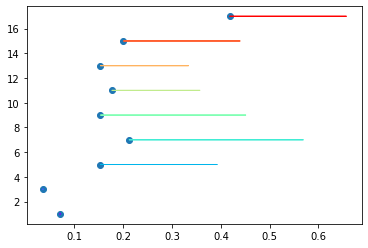

<Figure size 720x720 with 0 Axes>

In [36]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Depth)
for i in range(len(Depth)):
    
    plt.arrow(x=Within_Train[i],y=Depth[i],dx=Within_Test[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

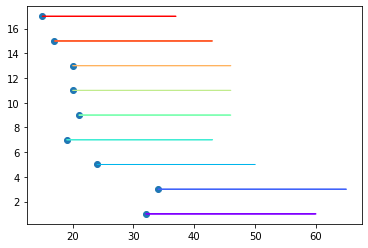

<Figure size 720x720 with 0 Axes>

In [37]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Score_train, Depth)
for i in range(len(Depth)):
    
    plt.arrow(x=Score_train[i],y=Depth[i],dx=Score_test[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

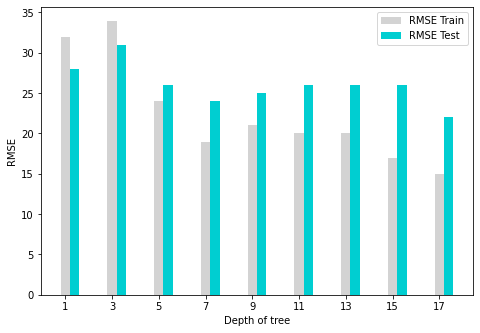

In [38]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(1,19,2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Score_train, color = 'lightgrey', width = 0.4)
ax.bar(X + 0.4,Score_test , color = 'darkturquoise', width = 0.4)
plt.ylabel('RMSE')   
plt.xlabel('Depth of tree')
plt.xticks(X)  
ax.legend(['RMSE Train','RMSE Test'])

In [39]:
Score_train

[32.0, 34.0, 24.0, 19.0, 21.0, 20.0, 20.0, 17.0, 15.0]

In [40]:
Score_test

[28.0, 31.0, 26.0, 24.0, 25.0, 26.0, 26.0, 26.0, 22.0]

* #### 4.8.2  Without Imbalance  <a class="anchor" id="4.8.2"></a> 

In [41]:
Score_test=[]
Score_train=[]
Depth=[]
Within_Test=[]
Within_Train=[]

for i in range(1,10):
    

    Score_train_intercalar=abs(Loading_Surgeon_models_withoutimbalanced[i]['TrainScore'])
    Score_test_intercalar=abs(Loading_Surgeon_models_withoutimbalanced[i]['TestScore'])
    depth=Loading_Surgeon_models_withoutimbalanced[i]['Depth']
    Within_intercalar_test=Loading_Surgeon_models_withoutimbalanced[i]['Percentage_Test_categorical'][0]
    Within_intercalar_train=Loading_Surgeon_models_withoutimbalanced[i]['Percentage_Train_categorical'][0]
     

    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Depth+=[depth]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]
    
      

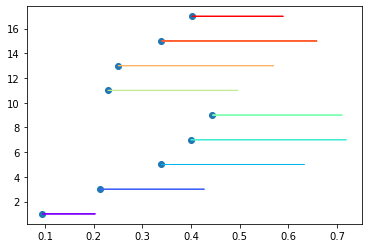

<Figure size 720x720 with 0 Axes>

In [42]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Depth)
for i in range(len(Depth)):
    
    plt.arrow(x=Within_Train[i],y=Depth[i],dx=Within_Test[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

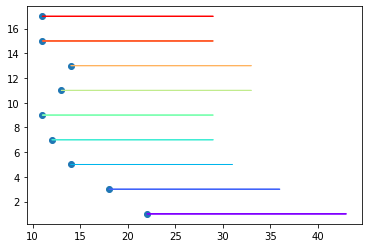

<Figure size 720x720 with 0 Axes>

In [43]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Score_train, Depth)
for i in range(len(Depth)):
    
    plt.arrow(x=Score_train[i],y=Depth[i],dx=Score_test[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

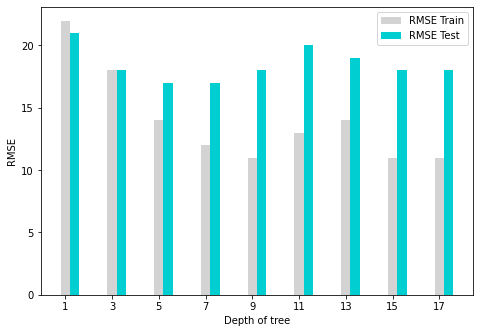

In [44]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(1,19,2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Score_train, color = 'lightgrey', width = 0.4)
ax.bar(X + 0.4,Score_test , color = 'darkturquoise', width = 0.4)
plt.ylabel('RMSE')   
plt.xlabel('Depth of tree')
plt.xticks(X)  
ax.legend(['RMSE Train','RMSE Test'])

* ### 4.9.  Predictions  <a class="anchor" id="4.9"></a> 

* #### 4.9.1  With Imbalance  <a class="anchor" id="4.9.1"></a> 

In [45]:
i=2
planned_bycuf=Loading_Surgeon_models[i]["Planned CUF"]
labels_test=Loading_Surgeon_models[i]["Label Test"]
real_duration=Loading_Surgeon_models[i]["Real Duration"]

print("Prediction to {} depth ".format(Loading_Surgeon_models[i]["Depth"]))

Prediction to 3 depth 


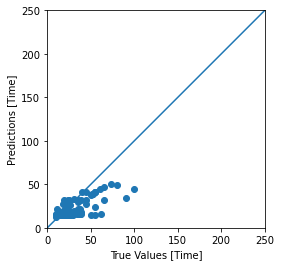

In [46]:
a = plt.axes(aspect='equal')
plt.scatter(real_duration, labels_test)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [47]:
def percCal(x,y):
    return (x-y)*100/x

dataset_predicton=Loading_Surgeon_models[i]['Dataset_predicton']
dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


Text(0.5, 1.0, '775653212')

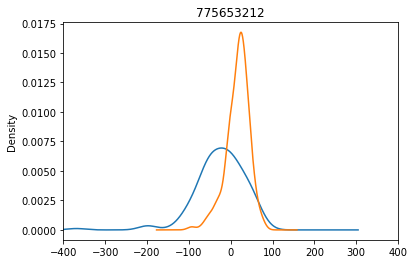

In [48]:


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_XGboost'].plot(kind='density')
plt.xlim([-400, 400])
plt.title(list_surgeons[i])


In [49]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

In [51]:
np.round(mean_squared_error(dataset_predicton['Labels from XGBoost'],dataset_predicton['Real Duration'],squared=False))


13.0

In [52]:
np.round(mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False))


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


17.0

In [50]:
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['XGBoost Model', XGBoost_Within, XGBoost_overuse,XGBoost_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  -------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.13924050632911392  0.27848101265822783  0.5822784810126582
XGBoost Model  0.23417721518987342  0.6518987341772152   0.11392405063291139
-------------  -------------------  -------------------  -------------------


In [223]:
dataset_predicton['Labels from XGBoost'].to_csv('Labels_XGBoost_surgeon_imbalanced',index=False)

-----

* #### 4.9.2  Without Imbalance  <a class="anchor" id="4.9.2"></a> 

In [54]:
#choose a number between 0-375 to choose speciality
i=2

planned_bycuf=Loading_Surgeon_models_withoutimbalanced[i]["Planned CUF"]
labels_test=Loading_Surgeon_models_withoutimbalanced[i]["Label Test"]
real_duration=Loading_Surgeon_models_withoutimbalanced[i]["Real Duration"]

print("Prediction to {} depth ".format(Loading_Surgeon_models_withoutimbalanced[i]["Depth"]))

Prediction to 3 depth 


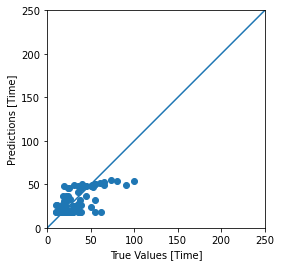

In [55]:
a = plt.axes(aspect='equal')
plt.scatter(real_duration, labels_test)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [70]:
def percCal(x,y):
    return (x-y)*100/x

dataset_predicton=Loading_Surgeon_models_withoutimbalanced[i]['Dataset_predicton']
dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


Text(0.5, 1.0, '775653212')

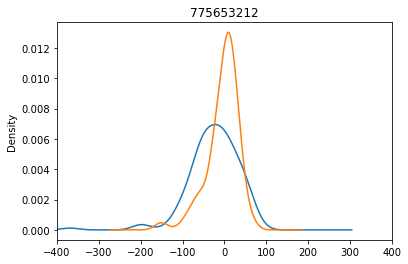

In [71]:


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_XGboost'].plot(kind='density')
plt.xlim([-400, 400])
plt.title(list_surgeons[i])


In [72]:
mean_squared_error(dataset_predicton['Labels from XGBoost'],dataset_predicton['Real Duration'],squared=False)
  

10.831806293354596

In [73]:
mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False)


16.990503676756422

In [58]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

In [59]:
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['XGBoost Model', XGBoost_Within, XGBoost_overuse,XGBoost_under]]
print(tabulate(table2))

-------------  -------------------  ------------------  -------------------
Model          Within               Overutilization     Underutilization
CUF Model      0.18421052631578946  0.7368421052631579  0.07894736842105263
XGBoost Model  0.21052631578947367  0.6578947368421053  0.13157894736842105
-------------  -------------------  ------------------  -------------------


In [230]:
dataset_predicton['Labels from XGBoost'].to_csv('Labels_XGBoost_surgeon_not_imbalanced',index=False)

---

* ### 4.10. SHAP Explanation <a class="anchor" id="4.10"></a>

In [57]:
#choose a number between 0-375 to choose speciality
i=2

X_shap=splittrain_test()[0] #drop column planned duration
 
    
bst_doctor = xgb.Booster()
bst_doctor.load_model("Surgeon_96440008_withoutimbalanced_depth{}.model".format(i))
   
shap_values = shap.TreeExplainer(bst_doctor).shap_values(X_shap)

explainer = shap.Explainer(bst_doctor)
shap_values1 = explainer(X_shap)

print("Prediction to {} depth ".format(Loading_Surgeon_models[i]["Depth"]))

XGBoostError: [10:30:09] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "Surgeon_5050005_withoutimbalanced_depth2.model": No such file or directory

The next explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 


#### 4.10.1 SHAP Summary Plot <a class="anchor" id="4.10.1"></a>

The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of dying for a Cox proportional hazards model. We can see below that the primary risk to a high use time according to the model is procedures.

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in time 


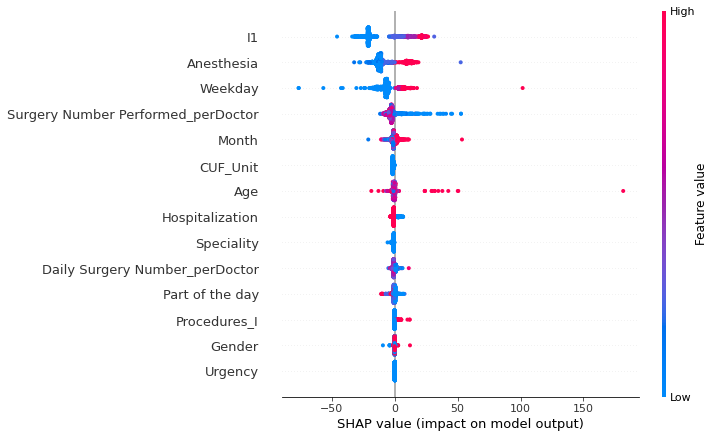

In [221]:
shap.summary_plot(shap_values, X_shap) #65.914215686 CIRURGIA Geral

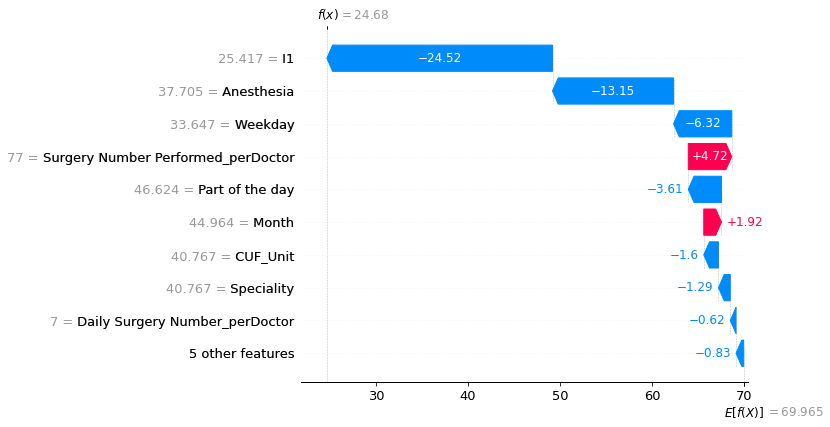

In [222]:
shap.plots.waterfall(shap_values1[0])

#### 4.10.2 SHAP Dependence Plots <a class="anchor" id="4.10.2"></a>

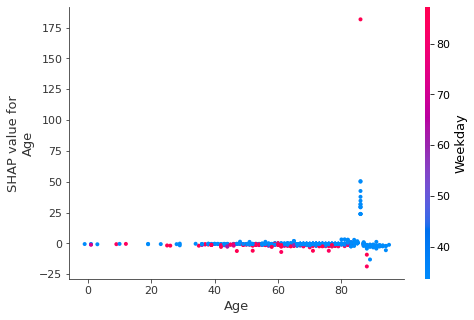

In [223]:
shap.dependence_plot("Age", shap_values, X_shap)

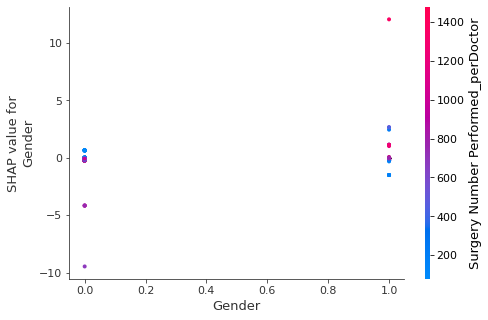

In [224]:
shap.dependence_plot("Gender", shap_values, X_shap)

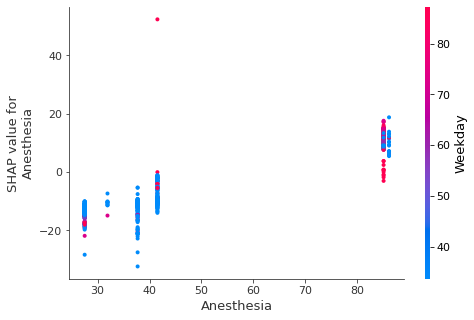

In [225]:
shap.dependence_plot("Anesthesia", shap_values, X_shap)

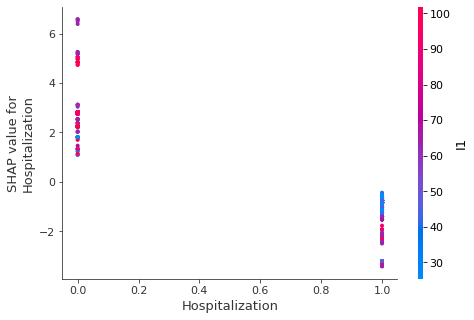

In [226]:
shap.dependence_plot("Hospitalization", shap_values, X_shap)

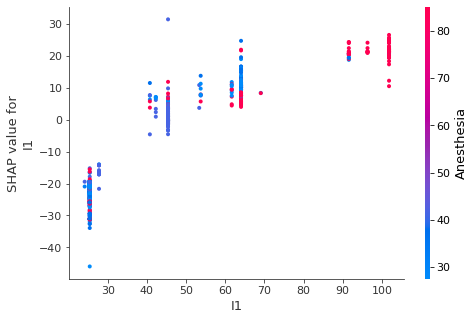

In [227]:
shap.dependence_plot("I1", shap_values, X_shap)

#### 4.10.3 Compute SHAP Interaction Values <a class="anchor" id="4.10.3"></a>

In [228]:
shap_interaction_values = shap.TreeExplainer(bst_doctor).shap_interaction_values(X_shap)

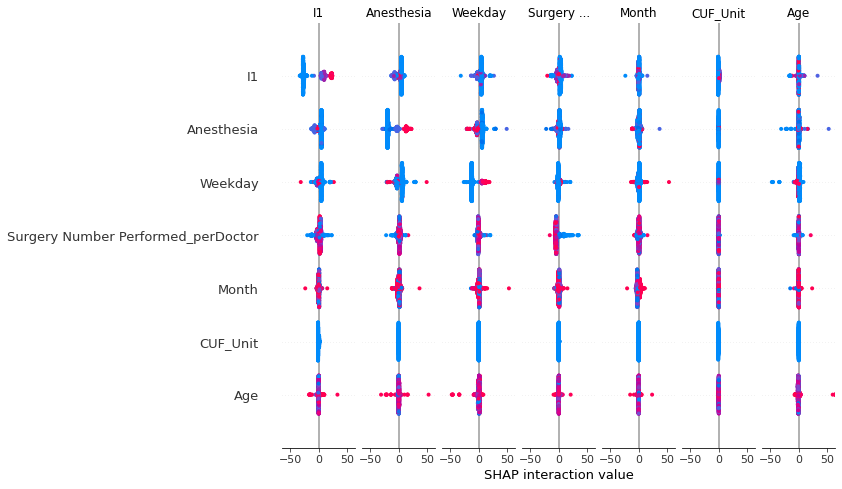

In [229]:
shap.summary_plot(shap_interaction_values, X_shap)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


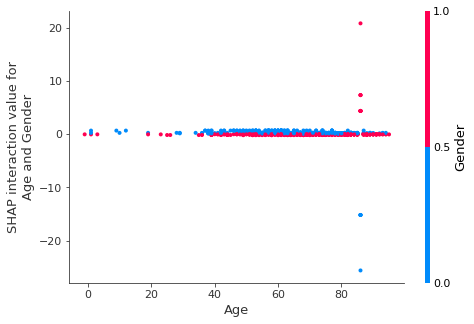

In [230]:
shap.dependence_plot(
    ("Age", "Gender"),
    shap_interaction_values, X_shap
)